In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


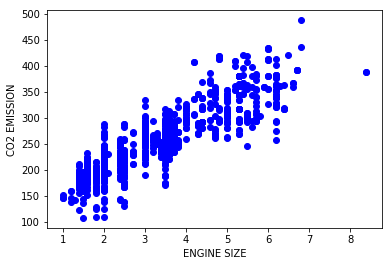

In [9]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='b')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSION")
plt.show()

In [10]:
mask=np.random.rand(len(df)) < 0.8
train=cdf[mask]
test=cdf[~mask]

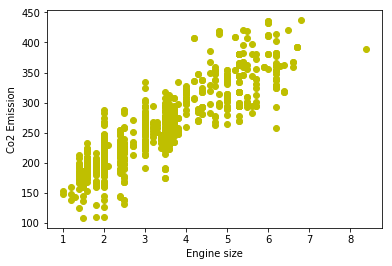

In [11]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='y')
plt.xlabel("Engine size")
plt.ylabel("Co2 Emission")
plt.show()

In [16]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE','FUELCONSUMPTION_COMB','CYLINDERS']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

print("Coeficent is :",regr.coef_)
print("Intercept is :",regr.intercept_)

Coeficent is : [[12.33659264  9.40159635  6.7818623 ]]
Intercept is : [67.13221713]


In [28]:
test_y_hat=regr.predict(test[['ENGINESIZE','FUELCONSUMPTION_COMB','CYLINDERS']])
test_x=np.asanyarray(test[['ENGINESIZE','FUELCONSUMPTION_COMB','CYLINDERS']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

print("Root mean square :",np.mean((test_y_hat-test_y)**2))
print("Variance score is:",regr.score(train_x,train_y))

Root mean square : 750.865857955631
Variance score is: 0.8619503576527471


In [29]:
regr.predict([[3.5,6,11.1]])

array([[203.28866221]])

In [27]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
print("Coeiffiecnt is ",regr.coef_)
print("Intercept is",regr.intercept_)

test_y_hat=regr.predict(test[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
test_x=np.asanyarray(test[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum square ",np.mean((test_y_hat-test_y)**2))
print("Variance score ",regr.score(test_x,test_y))
regr.predict([[3.5,8.7,12.7]])

Coeiffiecnt is  [[19.34070538  7.87570926  0.67670979]]
Intercept is [80.83045911]
Residual sum square  559.7090132529991
Variance score  0.8448125199026715


array([[225.63581288]])